In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# sns.color_palette("dark")
sns.set_palette("colorblind")
sns.set_style('white')
sns.set_context('talk')

In [13]:
def moving_average(x, w):
    x = np.convolve(x, np.ones(w), 'same') / w
    for i in range(0, int((w+1)/2)):
        x[i] = x[i] * (w/((w+1)/2 + i))
        if i != 0:
            x[-i] = x[-i] * (w/((w+1)/2 + i))
    return x

In [14]:
def parse_nohup(content):
    ep = []
    ep_curr = 0
    mofa_acc = []
    loss = []
    last_ktm = []
    first_ktm = []
    for line in content:
        if 'Epoch' in line:
#             ep.append(int(line[6:-1]))
            ep_curr += 1
            ep.append(ep_curr)
        elif 'mofa' in line:
            mofa_acc.append(int(line[-5:-3]))
        elif 'loss' in line:
            if '\t' in line:
                loss.append(float(line[15:-1]))
            else:
                loss.append(float(line[22:-1]))
        elif 'First' in line:
            first_ktm.append(float(line[19:-1]))
        elif 'Last' in line:
            last_ktm.append(float(line[18:-1]))

    # ep.insert(0, -1)
    mofa_acc.insert(0, base_acc)
    mofa_acc = mofa_acc[:-1]

    mov_loss = moving_average(loss, 101)
    return ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm

In [15]:
def plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec):
    xnew = np.arange(1, ep[-1] +1)*epoch_time_in_sec/60/60
    def forward(x):
        return np.interp(x, ep, xnew)


    def inverse(x):
        return np.interp(x, xnew, ep)

    f, ax = plt.subplots(1, figsize=(12, 6))
    plt.plot(ep, loss)
    plt.grid()
    plt.plot(ep, mov_loss, linewidth=3)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Random Subnet Loss', {'color':'C0'})

    ax2 = ax.twinx()
    ax2.plot(np.array(mofa_acc), 'C2')
    ax2.set_ylabel('MOFA Accuracy', {'color':'C2'})
    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    # secax.xaxis.set_minor_locator(AutoMinorLocator())
    secax.set_xlabel('RTX 2080Ti Hours')
    plt.show()

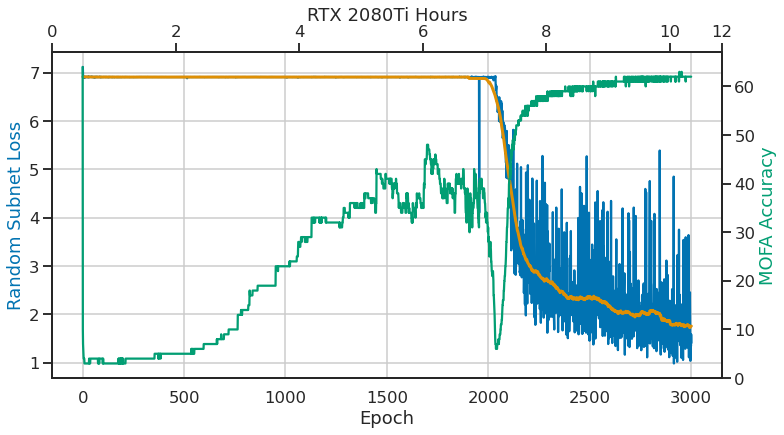

In [23]:
with open('nohup_elstc_kernel_over4clamp_arch1.out', 'r') as f:
    content = f.readlines()
base_acc = 64
epoch_time_in_sec = 13

ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec)

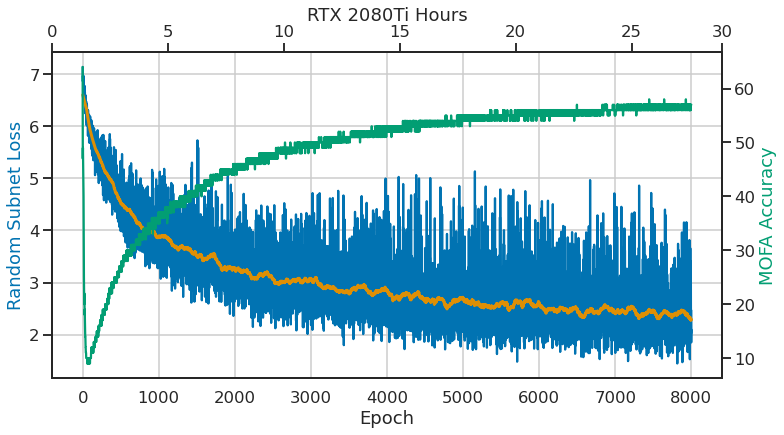

In [22]:
with open('nohup_elstc_depth_over4clamp_arch1.out', 'r') as f:
    content = f.readlines()
base_acc = 64
epoch_time_in_sec = 13

ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec)